# London Weather Prediction

## 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
import warnings
warnings.filterwarnings("ignore")

## 2. Reading the dataset

In [3]:
weather = pd.read_csv("london_weather.csv")
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


## 3. Converting and Extracting Date Components

In [4]:
weather["date"] = pd.to_datetime(weather["date"], format="%Y%m%d")
weather["year"] = weather["date"].dt.year
weather["month"] = weather["date"].dt.month

## 4. Aggregating and Averaging Weather Metrics

In [5]:
weather_metrics = ['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth']
weather_per_month = weather.groupby(['year', 'month'], as_index=False)[weather_metrics].mean()

## 5. Visualization of Data Trends

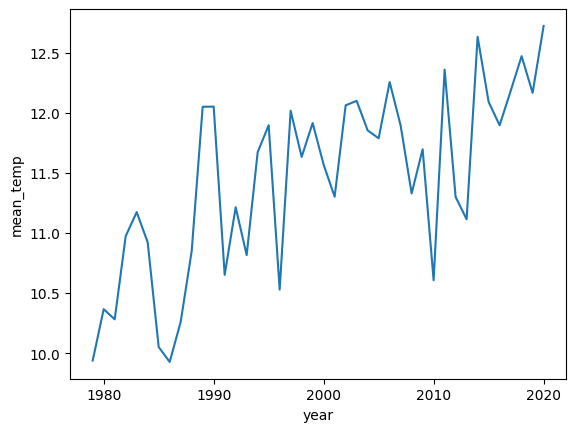

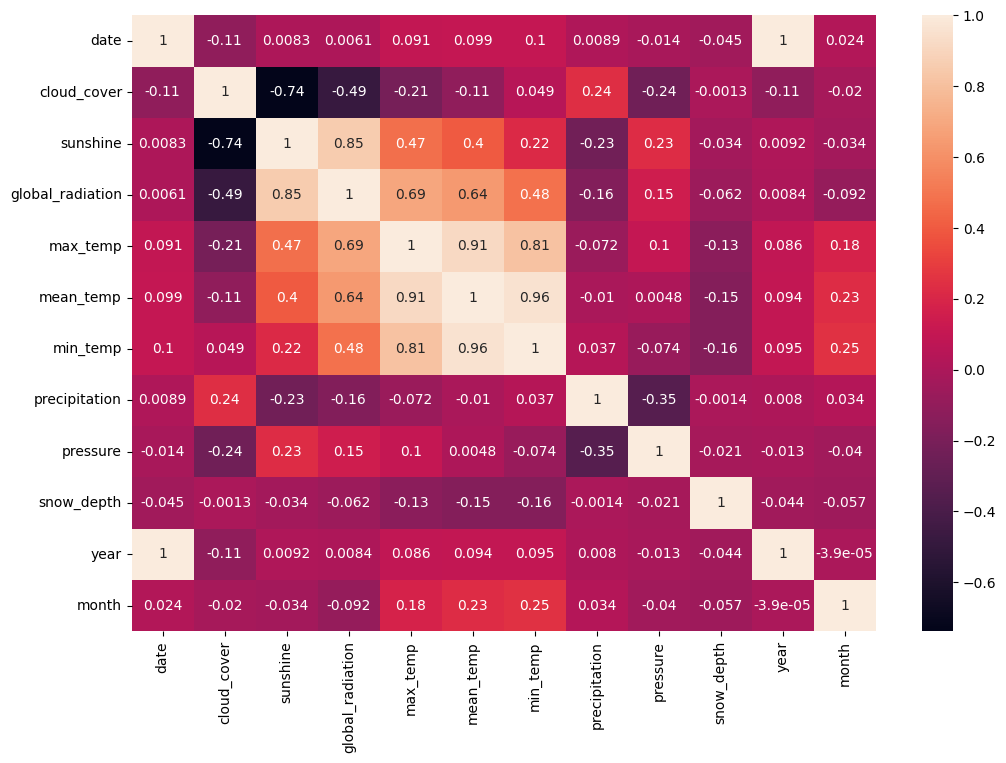

In [6]:
sns.lineplot(x="year", y="mean_temp", data=weather_per_month, ci=None)
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(weather.corr(), annot=True)
plt.show()

## 6. Feature and Target Selection

In [7]:
feature_selection = ['month', 'cloud_cover', 'sunshine', 'precipitation', 'pressure', 'global_radiation']
target_var = 'mean_temp'
weather = weather.dropna(subset=['mean_temp'])

## 7. Train-Test Split

In [8]:
X = weather[feature_selection]
y = weather[target_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

## 8. Data Preprocessing

In [9]:
#Handle Missing Values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test  = imputer.transform(X_test)

In [10]:
#Scale Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 9. Model Training, Evaluation, and MLflow Tracking

In [11]:
for idx, depth in enumerate([1, 2, 10]): 
    run_name = f"run_{idx}"
    with mlflow.start_run(run_name=run_name):

        #Models created inside each run:
        lin_reg = LinearRegression().fit(X_train, y_train)
        tree_reg = DecisionTreeRegressor(random_state=42, max_depth=depth).fit(X_train, y_train)
        forest_reg = RandomForestRegressor(random_state=42, max_depth=depth).fit(X_train, y_train)

        #Log Models to MLflow
        mlflow.sklearn.log_model(lin_reg, "lin_reg")
        mlflow.sklearn.log_model(tree_reg, "tree_reg")
        mlflow.sklearn.log_model(forest_reg, "forest_reg")

        #Evaluate Models
        #1. Linear Regression
        y_pred_lin_reg = lin_reg.predict(X_test)
        lin_reg_rmse = mean_squared_error(y_test, y_pred_lin_reg, squared=False)

        #2. Decision Tree
        y_pred_tree_reg = tree_reg.predict(X_test)
        tree_reg_rmse = mean_squared_error(y_test, y_pred_tree_reg, squared=False)

        #3. Random Forest
        y_pred_forest_reg = forest_reg.predict(X_test)
        forest_reg_rmse = mean_squared_error(y_test, y_pred_forest_reg, squared=False)

        #Log Parameters and Metrics
        mlflow.log_param("max_depth", depth)
        mlflow.log_metric("rmse_lr", lin_reg_rmse)
        mlflow.log_metric("rmse_tr", tree_reg_rmse)
        mlflow.log_metric("rmse_fr", forest_reg_rmse)

2025/10/05 19:31:09 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/05 19:31:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/10/05 19:31:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/05 19:31:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/10/05 19:31:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/05 19:31:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/10/05 19:31:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use 

## 10. Retrieve and Display Results

In [12]:
experiment_results = mlflow.search_runs()
experiment_results

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.rmse_lr,metrics.rmse_fr,metrics.rmse_tr,params.max_depth,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.runName,tags.mlflow.source.name
0,9381e41b6c0a476bb24dabe88f0fe392,0,FINISHED,file:///C:/Users/bhair/OneDrive/Desktop/My_Pro...,2025-10-05 13:47:20.657000+00:00,2025-10-05 13:47:53.338000+00:00,3.866773,2.814782,3.068346,10,Acer,LOCAL,run_2,C:\Users\bhair\AppData\Local\Programs\Python\P...
1,2845c8aa565445d6b974bdf6cc03a335,0,FINISHED,file:///C:/Users/bhair/OneDrive/Desktop/My_Pro...,2025-10-05 13:46:51.096000+00:00,2025-10-05 13:47:20.643000+00:00,3.866773,3.832143,3.917318,2,Acer,LOCAL,run_1,C:\Users\bhair\AppData\Local\Programs\Python\P...
2,877b673d83bb4b4e870d43d1628e0a92,0,FINISHED,file:///C:/Users/bhair/OneDrive/Desktop/My_Pro...,2025-10-05 13:46:09.206000+00:00,2025-10-05 13:46:51.081000+00:00,3.866773,4.694655,4.752035,1,Acer,LOCAL,run_0,C:\Users\bhair\AppData\Local\Programs\Python\P...
3,b8d7582f24e042f184827d23bd089e27,0,FINISHED,file:///C:/Users/bhair/OneDrive/Desktop/My_Pro...,2025-10-05 07:52:59.451000+00:00,2025-10-05 07:53:30.997000+00:00,3.866773,2.814782,3.068346,10,Acer,LOCAL,run_2,C:\Users\bhair\AppData\Local\Programs\Python\P...
4,96020988012e44db8e71923317224d8c,0,FINISHED,file:///C:/Users/bhair/OneDrive/Desktop/My_Pro...,2025-10-05 07:52:31.402000+00:00,2025-10-05 07:52:59.442000+00:00,3.866773,3.832143,3.917318,2,Acer,LOCAL,run_1,C:\Users\bhair\AppData\Local\Programs\Python\P...
5,27767127657043e8836ba9de8f791c42,0,FINISHED,file:///C:/Users/bhair/OneDrive/Desktop/My_Pro...,2025-10-05 07:51:34.672000+00:00,2025-10-05 07:52:31.392000+00:00,3.866773,4.694655,4.752035,1,Acer,LOCAL,run_0,C:\Users\bhair\AppData\Local\Programs\Python\P...


## Conclusion


From the MLflow experiment tracking results, we tested three models with different maximum depth values (1, 2, and 10). The RMSE values showed that models with higher depth achieved lower RMSE, indicating better prediction accuracy. Specifically, the model with a maximum depth of 10 performed the best with the lowest RMSE among all runs.
This demonstrates how MLflow helps efficiently track multiple experiments, compare model parameters and metrics, and identify the most effective configuration for our regression problem.
And from above results we can say that **Random Forest** with depth of 10 has the highest performance efficiency as it only has 2.81 rmse showing better performance than all other models and runs.